In [4]:
import time
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd

from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [5]:
options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ["enable-logging"])    
wd = webdriver.Chrome('./chromedriver.exe', options=options)

C:\Users\admin\AppData\Local\Temp\ipykernel_9952\3674344586.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('./chromedriver.exe', options=options)


## 스타벅스 매장 조회

In [6]:
star_url ="https://www.starbucks.co.kr/store/store_map.do"
wd.get(star_url)

### Selenium 버전에 따른 Tip

In [7]:
# selenium 4버전으로 변경되면서 함수 원형이 수정됨
# 새 패키지 추가
from selenium.webdriver.common.by import By

In [8]:
# Selenium3 버전
# driver.find_element_by_xpath('//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()

# Selenium4 버전
wd.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(2)
wd.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(2)
wd.find_element(By.XPATH, '//*[@id="mCSB_2_container"]/ul/li[1]/a').click()

In [9]:
req = wd.page_source
soup = BeautifulSoup(req, "html.parser")
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(info), info[0]

(588,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

In [10]:
name = info[0].find("strong").text.strip()
address = info[0].find(class_="result_details").text.strip()[:-9]
place = address.split(" ")[1]

name, address, place

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [11]:
star_info = []
for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]
   
    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

588

In [12]:
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [13]:
gu_list = list(set(df_star["구"]))
gu_list

['강동구',
 '관악구',
 '강남구',
 '서대문구',
 '광진구',
 '양천구',
 '구로구',
 '중구',
 '송파구',
 '서초구',
 '용산구',
 '종로구',
 '영등포구',
 '마포구',
 '강서구',
 '성북구',
 '동작구',
 '은평구',
 '동대문구',
 '강북구',
 '중랑구',
 '금천구',
 '성동구',
 '도봉구',
 '노원구']

## 이디야 매장 조회

In [14]:
edi_url = "https://www.ediya.com/contents/find_store.html"
wd = webdriver.Chrome("./chromedriver.exe", options=options)
wd.get(edi_url)

C:\Users\admin\AppData\Local\Temp\ipykernel_9952\1577385957.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome("./chromedriver.exe", options=options)


In [15]:
wd.find_element(By.XPATH, '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
wd.find_element(By.XPATH, '//*[@id="keyword"]').clear
wd.find_element(By.XPATH, '//*[@id="keyword"]').send_keys("서울 강남구")
wd.find_element(By.XPATH, '//*[@id="keyword_div"]/form/button').click()

html = wd.page_source
soup = BeautifulSoup(html, "html.parser")

info = soup.find("ul", id = "placesList").find_all("li", class_='item')

info

[]

In [16]:
edi_info = []



for gu in gu_list:
    wd.find_element(By.XPATH,'//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    wd.find_element(By.XPATH,'//*[@id="keyword"]').clear
    wd.find_element(By.XPATH,'//*[@id="keyword"]').send_keys("서울 " + gu)
    wd.find_element(By.XPATH,'//*[@id="keyword_div"]/form/button').click()
    
    html = wd.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]
        

        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)

731

In [17]:
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
726,창동제일점,도봉구,서울 도봉구 노해로70길 81 (창동)
727,창동중앙점,도봉구,서울 도봉구 노해로63길 78 (창동)
728,창동하나로마트점,도봉구,"서울 도봉구 마들로11길 20 (창동, 농협창동유통센타)"
729,창동학원가점,도봉구,서울 도봉구 해등로16길 61 (창동)
730,창동현대타운점,도봉구,서울 도봉구 도봉로114길 22 (창동)


## 구별 매장 수 확인 및 차이 구하기

In [19]:
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,강동구,17
1,관악구,12
2,강남구,89
3,서대문구,21
4,광진구,19
5,양천구,17
6,구로구,12
7,중구,53
8,송파구,34
9,서초구,48


In [20]:
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,강동구,27
1,관악구,28
2,강남구,88
3,서대문구,21
4,광진구,24
5,양천구,54
6,구로구,0
7,중구,29
8,송파구,39
9,서초구,29


In [21]:
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,강동구,27,17,10
1,관악구,28,12,16
2,강남구,88,89,-1
3,서대문구,21,21,0
4,광진구,24,19,5
5,양천구,54,17,37
6,구로구,0,12,-12
7,중구,29,53,-24
8,송파구,39,34,5
9,서초구,29,48,-19


### 한글 깨지기 방지

In [45]:
# import matplotlib.font_manager as fm
# [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

In [41]:

# plt.rcParams['font.family']='NanumBarunGothic'

In [51]:
# from matplotlib import rc
# import matplotlib.font_manager as fm

# fm.get_fontconfig_fonts()

# # 디렉토리 및 파일 이름에 맞추어 변경
# font_location = './NanumGothic.ttf'

# font_name = fm.FontProperties(fname=font_location).get_name()
# rc('font', family=font_name)

In [43]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmex10',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXSizeFiveSym',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'DejaVu Serif Display',
 'DejaVu Sans Mono',
 'cmb10',
 'DejaVu Sans Mono',
 'cmmi10',
 'STIXGeneral',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXSizeFourSym',
 'STIXGeneral',
 'cmsy10',
 'cmtt10',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'cmss10',
 'cmr10',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'Trebuchet MS',
 'Calibri',
 'Nirmala UI',
 'Segoe UI',
 'Microsoft PhagsPa',
 'SimSun-ExtB',
 'NanumBarunGothic',
 'Leelawadee UI',
 'Constantia',
 'Times New Roman',
 'Palatino Linotype',
 'Batang',
 'Microsoft Himalaya',
 'Ebrima',
 'Sitka Small',
 'Palatino Linotype',
 'Microsoft YaHei',
 'Trebuchet MS',
 'Segoe UI',
 'Arial',
 'Courie

In [49]:
# 설치된 글꼴에서 마이너스 기호가 깨질 때
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

## 데이터 시각화

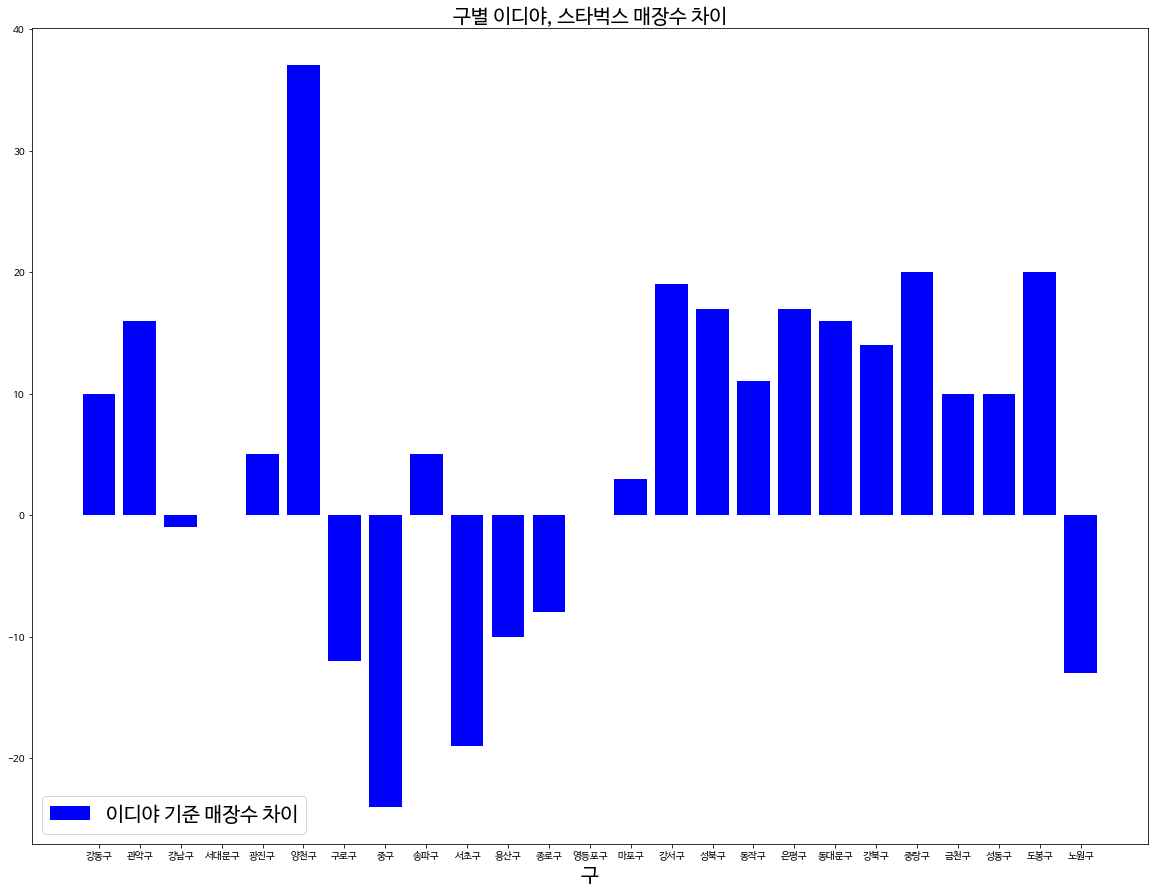

In [50]:

a = sum_data["매장 수 차이"]
y = "ediya"

plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()